歷史本行營業時間牌告匯率


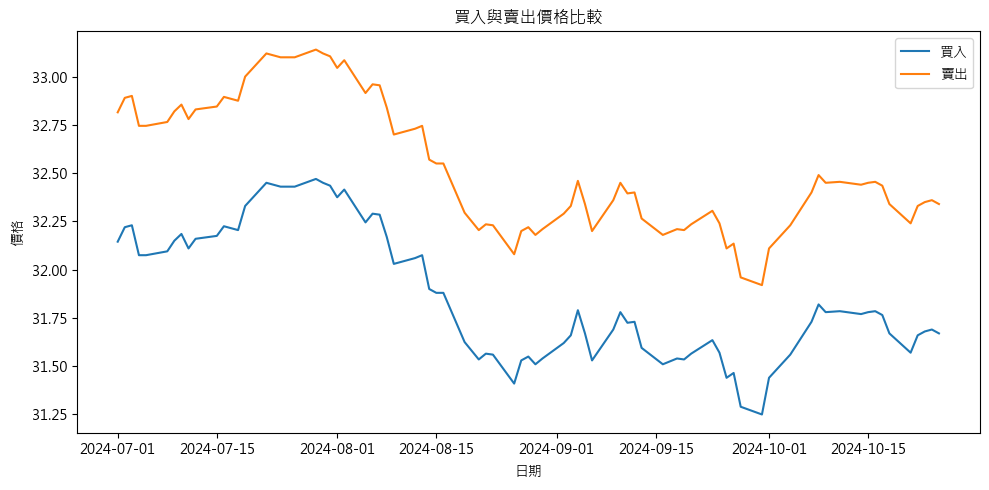

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 定义要抓取的 URL
url = 'https://rate.bot.com.tw/xrt/quote/ltm/USD'

# 请求 HTML 内容
response = requests.get(url)
response.encoding = 'UTF-8'

# 检查请求是否成功
if response.status_code == 200:
    sp = BeautifulSoup(response.text, 'lxml')
    print(sp.title.text)

    # 提取数据
    datas = sp.find_all('td', class_="rate-content-cash text-right print_table-cell")
    dates = sp.find_all('td', class_="text-center")

    # 创建字典以存储日期和汇率
    exchange_rates = {"日期": [], "買入": [], "賣出": []}

    # 填充字典
    for i in range(1, len(datas), 2):
        date = dates[i - 1].text.strip()  # 去除空白
        sell_rate_buy = float(datas[i - 1].text.strip())  # 转换为 float
        sell_rate_sell = float(datas[i].text.strip())  # 转换为 float
        
        exchange_rates["日期"].append(date)
        exchange_rates["買入"].append(sell_rate_buy)
        exchange_rates["賣出"].append(sell_rate_sell)

    # 创建 DataFrame
    out = pd.DataFrame(exchange_rates)

    # 将 '日期' 转换为 datetime
    out['日期'] = pd.to_datetime(out['日期'], format='%Y/%m/%d')

    # 设置绘图参数
    plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
    plt.rcParams["axes.unicode_minus"] = False
    plt.figure(figsize=(10, 5))

    # 绘制数据
    plt.plot(out["日期"], out["買入"], label="買入")
    plt.plot(out["日期"], out["賣出"], label="賣出")

    # 标记坐标轴
    plt.xlabel('日期')
    plt.ylabel('價格')
    plt.title('買入與賣出價格比較')

    # 显示图例并绘制图形
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 如果需要将 DataFrame 保存为 Excel 文件，可以取消注释下面的行
    # out.to_excel("./test.xlsx", index=False)
else:
    print(f"数据获取失败，状态码：{response.status_code}")
    
